In [1]:
import sys
import argparse

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_90 = pd.read_csv('DM_creditcard_2023_train_90_percent.csv')
df_10 = pd.read_csv('DM_creditcard_2023_test_10_percent.csv')

In [3]:
print("Feature names:", list(df_90.columns))
print("Total records:", df_90.shape[0])

print("Feature names:", list(df_10.columns))
print("Total records:", df_10.shape[0])

Feature names: ['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class_label']
Total records: 511767
Feature names: ['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class_label']
Total records: 56863


In [4]:
df_90.head()
df_10.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class_label
0,437378,0.420468,-0.070194,-0.569266,0.191673,-0.009607,0.426903,-0.356728,0.096143,0.077806,...,0.134969,0.070433,0.047770,-0.851622,0.102876,-0.375436,0.820807,0.665983,8633.18,1
1,504222,-0.238944,0.250929,-0.374408,0.152938,-0.105008,-0.039028,-0.293004,0.133771,-0.591631,...,0.192405,0.289441,-0.255187,-0.817462,0.308284,1.582688,0.574425,0.478489,12299.55,1
2,4794,-0.117796,-0.147961,2.130455,-0.325762,0.325616,0.271351,0.772625,-0.244342,1.240012,...,-0.271739,-0.404654,-0.121235,0.857659,0.541920,0.756534,-0.238177,-0.403038,5215.87,0
3,388411,-0.855315,0.137014,-0.628116,0.613733,-0.643573,-0.664283,-0.880040,0.466586,-1.045508,...,0.405505,0.167560,0.446262,-0.205976,0.492582,0.658619,1.609128,-0.025592,19282.98,1
4,424512,0.257686,0.035247,-0.203112,0.506745,-0.242235,-0.192608,-0.289297,0.044488,-0.396122,...,0.162191,0.165912,-0.181999,0.331451,1.043095,0.029799,0.643273,0.736723,19114.27,1


In [5]:
df_90_1 = df_90[df_90.Class_label == 1]
df_90_0 = df_90[df_90.Class_label == 0]

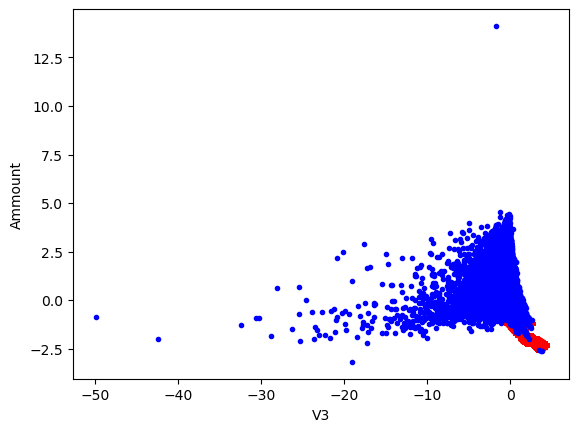

In [6]:
plt.xlabel('V3')
plt.ylabel('Ammount')
plt.scatter(df_90_1['V2'], df_90_1['V3'], color='red', marker='+')
plt.scatter(df_90_0['V2'], df_90_0['V3'], color='blue', marker='.')

In [7]:
X_train = df_90.drop('Class_label', axis=1)
y_train = df_90['Class_label']

X_test = df_10.drop('Class_label', axis=1)
y_test = df_10['Class_label']

In [8]:
print(len(X_train))
print(len(X_test))

511767
56863


In [9]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')  # Linear kernel and C=1.0 (can adjust these parameters)

In [10]:
# Fit the model to the training data
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(y_pred)

[1 1 0 ... 0 0 1]


In [11]:
percentage = svm_model.score(X_test, y_test)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9989624184443311
Precision: 1.0
Recall: 0.9979198984628402
F1 Score: 0.998958866399619
Confusion Matrix:
[[28499     0]
 [   59 28305]]


In [13]:
# Add predictions as a new column to df_10
df_10['Predicted_Class'] = predictions

# Save the updated DataFrame back to a CSV file
df_10.to_csv('DM_creditcard_2023_test_10_percent.csv', index=False)
